Part 1: Analyzing Best-Seller Trends Across Product Categories
1.1 Crosstab Analysis
Create a crosstab between product category and best-seller status:

In [3]:
import pandas as pd

# Load the dataset (assuming the dataset is in a CSV format)
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Crosstab analysis between 'category' and 'isBestSeller'
crosstab = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')
print(crosstab)

# Calculate proportion of best-sellers for each category
df_best_seller_proportion = df.groupby('category')['isBestSeller'].mean().sort_values(ascending=False)
print(df_best_seller_proportion)

isBestSeller                       False     True 
category                                          
3D Printers                     0.995968  0.004032
3D Printing & Scanning          0.999508  0.000492
Abrasive & Finishing Products   0.980000  0.020000
Action Cameras                  0.999411  0.000589
Adapters                        0.988189  0.011811
...                                  ...       ...
Wind Instruments                0.972000  0.028000
Window Treatments               0.979079  0.020921
Women                           0.988015  0.011985
Women's Sports & Outdoor Shoes  0.989791  0.010209
eBook Readers & Accessories     1.000000  0.000000

[296 rows x 2 columns]
category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
                                    ...   
Bedding Collections               0.000000
CPU

1.2 Statistical Tests
Chi-square test:

In [4]:
from scipy.stats import chi2_contingency

# Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(df['category'], df['isBestSeller']))
print(f"Chi-square Statistic: {chi2_stat}, p-value: {p_val}")

Chi-square Statistic: 36540.20270061387, p-value: 0.0


Cramér's V:

In [5]:
import numpy as np

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Apply Cramér's V
cramers_v_value = cramers_v(pd.crosstab(df['category'], df['isBestSeller']))
print(f"Cramér's V: {cramers_v_value}")

Cramér's V: isBestSeller
False    0.122483
True     2.139853
dtype: float64


1.3 Visualization (Stacked Bar Chart)

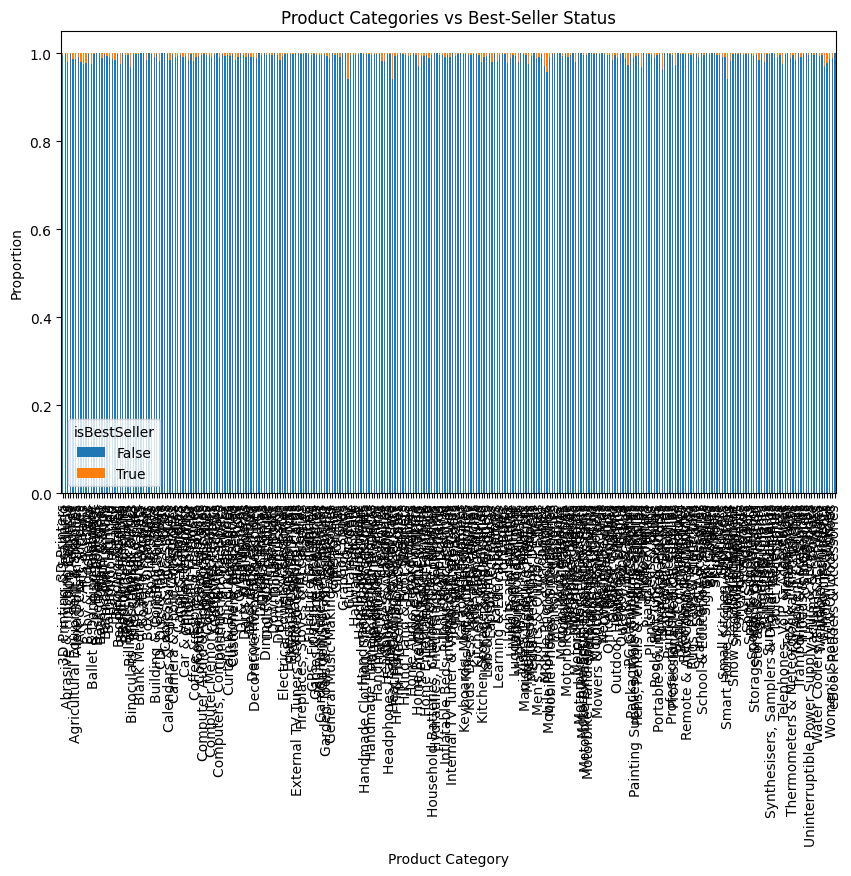

In [6]:
import matplotlib.pyplot as plt

# Stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Product Categories vs Best-Seller Status')
plt.xlabel('Product Category')
plt.ylabel('Proportion')
plt.show()

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
2.1 Remove Outliers
Using the IQR method:

In [7]:
# Remove outliers from the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtering data for outliers
df_no_outliers = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

2.2 Violin Plots for Price Distribution

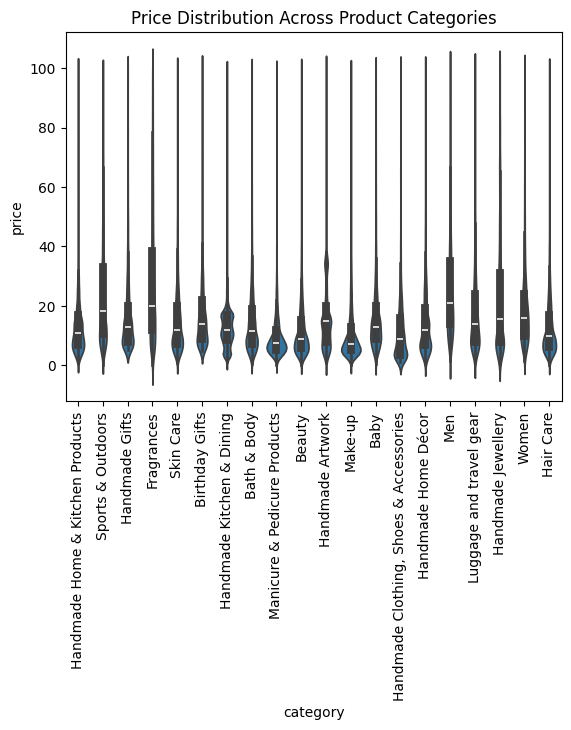

In [8]:
import seaborn as sns

# Violin plot for top 20 categories
top_categories = df_no_outliers['category'].value_counts().index[:20]
sns.violinplot(x='category', y='price', data=df_no_outliers[df_no_outliers['category'].isin(top_categories)])
plt.xticks(rotation=90)
plt.title('Price Distribution Across Product Categories')
plt.show()

2.3 Bar Charts for Average Price by Category

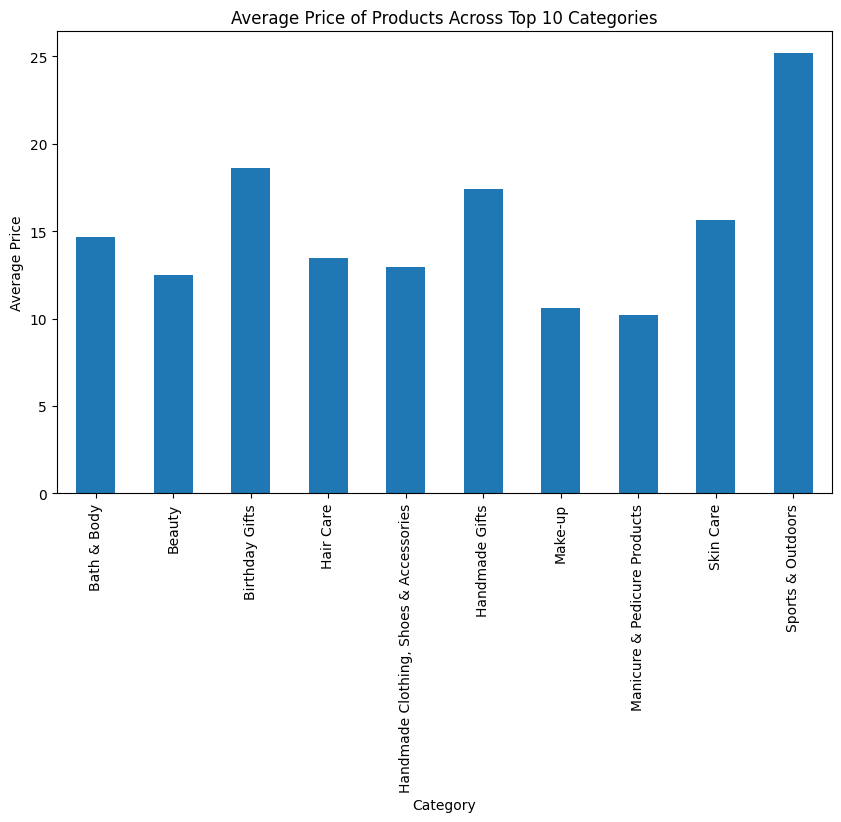

In [9]:
# Bar chart for average price across top 10 product categories
top_categories = df_no_outliers['category'].value_counts().index[:10]
avg_price_by_category = df_no_outliers[df_no_outliers['category'].isin(top_categories)].groupby('category')['price'].mean()

avg_price_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Average Price of Products Across Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()

2.4 Box Plots for Ratings by Category

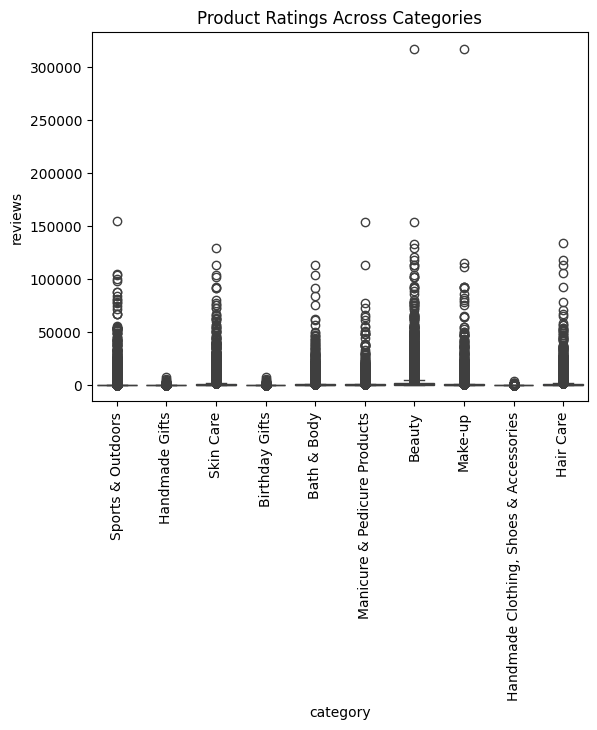

In [11]:
# Box plot for ratings across top 10 categories
sns.boxplot(x='category', y='reviews', data=df[df['category'].isin(top_categories)])
plt.xticks(rotation=90)
plt.title('Product Ratings Across Categories')
plt.show()

Part 3: Investigating the Interplay Between Product Prices and Ratings
3.1 Correlation Coefficients

In [12]:
# Correlation between price and rating (stars)
correlation = df['price'].corr(df['reviews'])
print(f"Correlation between Price and Rating: {correlation}")

Correlation between Price and Rating: -0.013171011618627411


3.2 Scatter Plot for Price and Rating

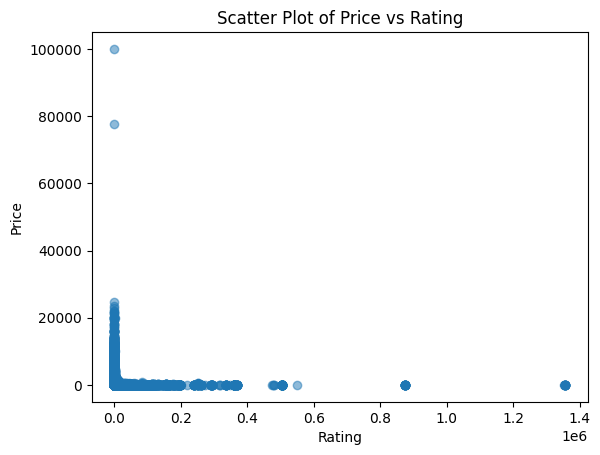

In [13]:
# Scatter plot between price and rating
plt.scatter(df['reviews'], df['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

3.3 Correlation Heatmap

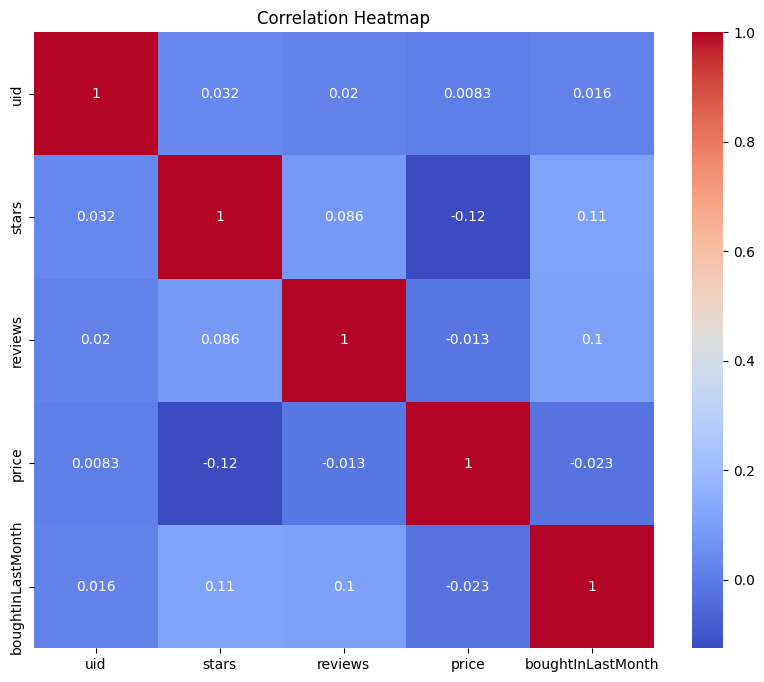

In [15]:
# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[float, int])

# Ahora puedes calcular la correlación solo entre columnas numéricas
correlation_matrix = df_numeric.corr()

# Crear el heatmap usando seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

3.4 QQ Plot for Price Distribution

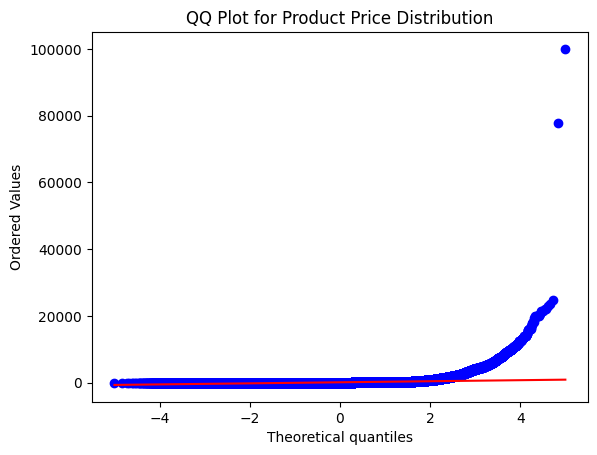

In [16]:
import scipy.stats as stats

# QQ plot for checking if price follows normal distribution
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Price Distribution')
plt.show()